In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import random
from quantumNetwork import QuantumNetwork
from qTable import QTable


In [2]:
# Example 2: Attempt to Overuse Qubits
initial_edges = [(0, 2), (1, 2), (2, 3), (3, 4), (3, 5)]
goalWeights = [((0, 3), 0.7), ((1, 5), 0.)]
network = QuantumNetwork(initial_edges, goalWeights=goalWeights, pGen=1, pSwap=1, maxAge=3)

q_table = QTable(default_q_value=0.0)


In [3]:
import sys
print(sys.getsizeof(network))

48


Current State:
{(0, 2): 0, (2, 3): 0, (3, 4): 0}

Possible Actions:
[([(0, 2), (2, 3)], (0, 3)), ([], None)]

Epsilon-greedy selections (epsilon=0.5):
Selection 1: ([], None)
Selection 2: ([], None)
Selection 3: ([], None)
Selection 4: ([], None)
Selection 5: ([(0, 2), (2, 3)], (0, 3))


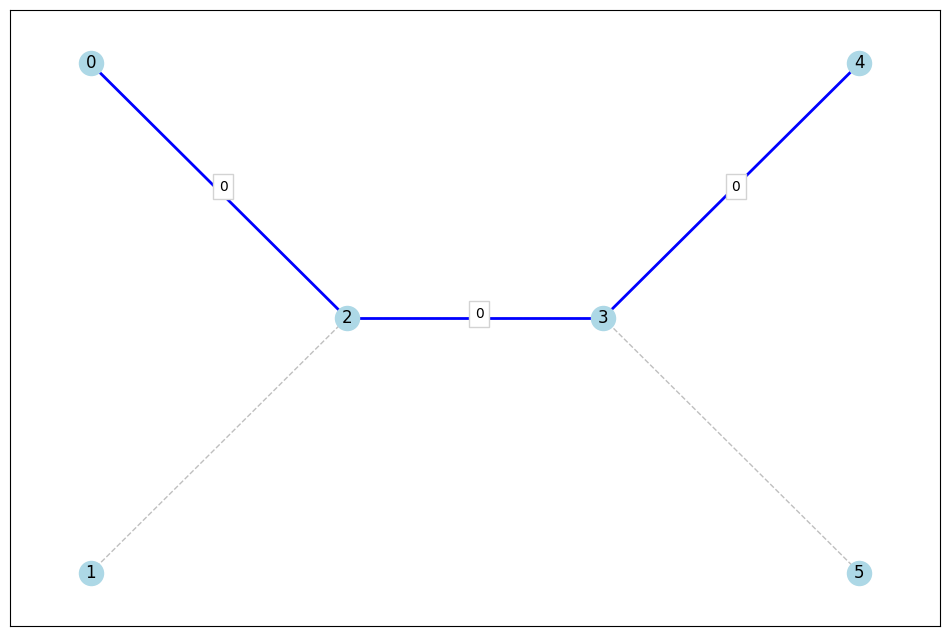

In [4]:
# Clear and initialize network
network = QuantumNetwork(initial_edges, goalWeights=goalWeights, pGen=0.8, pSwap=1, maxAge=3)

# Generate some entanglements
network.generateEntanglement(0, 2)
network.generateEntanglement(2, 3)
network.generateEntanglement(3, 4)

# Print current state
print("Current State:")
print(network.getState())

# Get possible actions
print("\nPossible Actions:")
print(network.getActions())

# Try epsilon-greedy selection multiple times
print("\nEpsilon-greedy selections (epsilon=0.5):")
for i in range(5):
    action = network.getActionEpsilonGreedyPolicy(q_table, network.getState(), epsilon=0.5)
    print(f"Selection {i+1}: {action}")

# Draw the network to visualize
network.drawNetwork()

In [5]:
# Test Q-table updates and storage
print("Testing Q-table Update Functionality:")
print("-" * 50)

# 1. Get initial state and action
current_state = network.getState()
possible_actions = network.getActions()

# 2. Print initial Q-values
print("\nInitial Q-values:")
for action in possible_actions:
    value = q_table.get_q_value(current_state, action)
    print(f"Action {action}: {value}")

# 3. Test updating values
print("\nTesting Q-value updates:")
test_values = [0.1, 0.5, 0.9]  # Test different values
for action in possible_actions:
    print(f"\nTesting updates for action: {action}")
    for test_value in test_values:
        # Update value
        q_table.update_q_value(current_state, action, test_value)
        # Retrieve value
        stored_value = q_table.get_q_value(current_state, action)
        # Verify
        print(f"Set value: {test_value}, Retrieved value: {stored_value}")
        print(f"Update successful: {abs(test_value - stored_value) < 1e-10}")

# 4. Test state persistence
print("\nTesting state persistence:")
# Create a slightly different state
new_state = current_state.copy()
new_state[(0, 2)] = 1  # Change one value

# Update value in new state
test_action = possible_actions[0]
q_table.update_q_value(new_state, test_action, 0.7)

print("\nValues for same action in different states:")
print(f"Original state value: {q_table.get_q_value(current_state, test_action)}")
print(f"New state value: {q_table.get_q_value(new_state, test_action)}")

# 5. Print full Q-table contents
print("\nFull Q-table contents:")
# Convert defaultdict to regular dict for printing
q_dict = dict(q_table.q_table)
for state_key in q_dict:
    print(f"\nState: {dict(state_key)}")
    for action_key, value in q_dict[state_key].items():
        print(f"Action: {action_key}, Value: {value}")

Testing Q-table Update Functionality:
--------------------------------------------------

Initial Q-values:
Action ([(0, 2), (2, 3)], (0, 3)): 0.0
Action ([], None): 0.0

Testing Q-value updates:

Testing updates for action: ([(0, 2), (2, 3)], (0, 3))
Set value: 0.1, Retrieved value: 0.1
Update successful: True
Set value: 0.5, Retrieved value: 0.5
Update successful: True
Set value: 0.9, Retrieved value: 0.9
Update successful: True

Testing updates for action: ([], None)
Set value: 0.1, Retrieved value: 0.1
Update successful: True
Set value: 0.5, Retrieved value: 0.5
Update successful: True
Set value: 0.9, Retrieved value: 0.9
Update successful: True

Testing state persistence:

Values for same action in different states:
Original state value: 0.9
New state value: 0.7

Full Q-table contents:

State: {(0, 2): 0, (2, 3): 0, (3, 4): 0}
Action: (((0, 2), (2, 3)), (0, 3)), Value: 0.9
Action: ((), None), Value: 0.9

State: {(0, 2): 1, (2, 3): 0, (3, 4): 0}
Action: (((0, 2), (2, 3)), (0, 3)), 

In [6]:
print(sys.getsizeof(network))
print(sys.getsizeof(q_table))

48
48


Testing the Epsilon Greedy Function



In [21]:
# Check that the Q tables is working, also the epsilon greedy policy
random.seed(41)
np.random.seed(41)

# Get current state and possible actions
current_state = network.getState()
possible_actions = network.getActions()

print("Current Network State:")
print(current_state)

print("\nPossible Actions in Current State:")
for i, action in enumerate(possible_actions):
    print(f"{i}: {action}")

# Set Q-values only for actually possible actions
for action in possible_actions:
    if action == possible_actions[0]:
        q_table.update_q_value(current_state, action, 0.9)
    elif action == possible_actions[1]:
        q_table.update_q_value(current_state, action, 0.3)
    else:
        q_table.update_q_value(current_state, action, 0.1)

print("\nQ-values for Possible Actions:")
for action in possible_actions:
    value = q_table.get_q_value(current_state, action)
    print(f"Action {action} -> Q-value: {value}")

# Test with more trials to better see the distribution
print("\nTesting epsilon-greedy policy:")
for epsilon in [0.0, 1.0, 0.5]:
    print(f"\nWith epsilon = {epsilon}:")
    action_counts = {str(action): 0 for action in possible_actions}
    
    n_trials = 20
    for i in range(n_trials):
        chosen_action = network.getActionEpsilonGreedyPolicy(q_table, current_state, epsilon)
        chosen_value = q_table.get_q_value(current_state, chosen_action)
        action_counts[str(chosen_action)] += 1
    
    print("\nAction distribution:")
    for action, count in action_counts.items():
        print(f"{action}: {count}/{n_trials} ({count/n_trials*100:.1f}%)")

Current Network State:
{(1, 2): 0, (3, 4): 0}

Possible Actions in Current State:
0: ([], None)

Q-values for Possible Actions:
Action ([], None) -> Q-value: 0.9

Testing epsilon-greedy policy:

With epsilon = 0.0:

Action distribution:
([], None): 20/20 (100.0%)

With epsilon = 1.0:

Action distribution:
([], None): 20/20 (100.0%)

With epsilon = 0.5:

Action distribution:
([], None): 20/20 (100.0%)


In [22]:
ca

NameError: name 'ca' is not defined